In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics
#https://www.jianshu.com/p/ee91d8880bbd
#https://www.jianshu.com/p/a8d75f06194b

In [4]:
train = pd.read_csv(r'/home/lano/DeepLearning/Kaggle/Titanic/train.csv')
test = pd.read_csv(r'/home/lano/DeepLearning/Kaggle/Titanic/test.csv')

In [47]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
train2 = train.loc[:,['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
test2 = test.loc[:, ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']]

In [7]:
test2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [8]:
age = train2['Age'].median() # 年龄中位数
age

28.0

In [9]:
train2['Age'].isnull() # 空值转bool值

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [10]:
test2.loc[test2['Age'].isnull(), 'Age'] = age # 为test2中年龄为空值的数据填充年龄中位数

In [11]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [12]:
Fare = test2['Fare'].mode()
Fare

test2.loc[test['Fare'].isnull(),'Fare'] = Fare[0]

train2.info(),test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


(None, None)

In [13]:
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [14]:
train2.dtypes,test2.dtypes # 列数据类型

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Fare           float64
 dtype: object, PassengerId      int64
 Pclass           int64
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Fare           float64
 dtype: object)

In [15]:
train2['Sex'] = train2['Sex'].map({'female':0, 'male':1}).astype(int)
test2['Sex'] = test2['Sex'].map({'female': 0, 'male': 1}).astype(int)
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [16]:
train2.loc[:,'SibSp'] #兄妹个数
train2.loc[:,'Parch'] #父母子女个数

train2['familysize'] = train2.loc[:,'SibSp'] + train2.loc[:,'Parch'] + 1
test2['familysize'] = test2.loc[:,'SibSp'] + test2.loc[:,'Parch'] + 1

In [17]:
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,familysize
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,1


In [18]:
train2['isalone'] = 0
train2.loc[train2['familysize'] == 1,'isalone'] = 1

In [19]:
train2.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,familysize,isalone
0,1,0,3,1,22.0,1,0,7.2500,2,0
1,2,1,1,0,38.0,1,0,71.2833,2,0
2,3,1,3,0,26.0,0,0,7.9250,1,1
3,4,1,1,0,35.0,1,0,53.1000,2,0
4,5,0,3,1,35.0,0,0,8.0500,1,1


In [20]:
train3 = train2.loc[:,['PassengerId','Survived','Pclass','Sex','Age','Fare','familysize','isalone']]
train3.head()
test3 = test2.loc[:,['PassengerId','Pclass','Sex','Age','Fare','familysize','isalone']]
test3.head()

/home/lano/anaconda3/envs/TF2_Tutprial/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,PassengerId,Pclass,Sex,Age,Fare,familysize,isalone
0,892,3,1,34.5,7.8292,1,NaN
1,893,3,0,47.0,7.0000,2,NaN
2,894,2,1,62.0,9.6875,1,NaN
3,895,3,1,27.0,8.6625,1,NaN
4,896,3,0,22.0,12.2875,3,NaN


In [21]:
d = train3[['isalone', 'Survived']].groupby(['isalone']).mean()
d

,Survived
isalone,
0,0.505650
1,0.303538


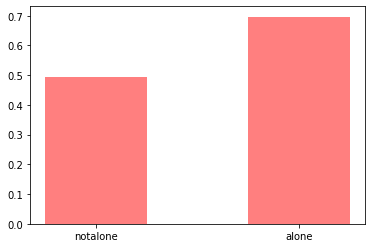

In [22]:
plt.bar(
    [0,1],
    [1-d.loc[0,'Survived'],1-d.loc[1,'Survived']],
    0.5,
    color='r',
    alpha=0.5,
)

plt.xticks([0,1],['notalone','alone'])

plt.show()

In [23]:
n = train3[['Sex', 'Survived']].groupby(['Sex']).mean()
n

,Survived
Sex,
0,0.742038
1,0.188908


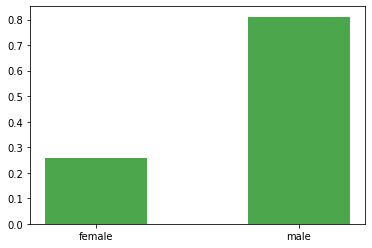

In [24]:
plt.bar(
    [0,1],
    [1-n.loc[0,'Survived'],1-n.loc[1,'Survived']],
    0.5,
    color='g',
    alpha=0.7
)

plt.xticks([0,1],['female','male'])

plt.show()

In [25]:
c = train3[['Pclass', 'Survived']].groupby(['Pclass']).mean()
c

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


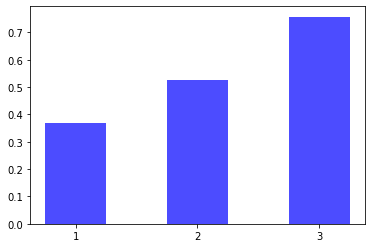

In [26]:
plt.bar(
    [0,1,2],
    [1-c.loc[1,'Survived'],1-c.loc[2,'Survived'],1-c.loc[3,'Survived']],
    0.5,
    color='b',
    alpha=0.7
)

plt.xticks([0,1,2],[1,2,3])

plt.show()

In [27]:
age = train3[['Age', 'Survived']].groupby(['Age']).mean()
age

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


TypeError: only size-1 arrays can be converted to Python scalars

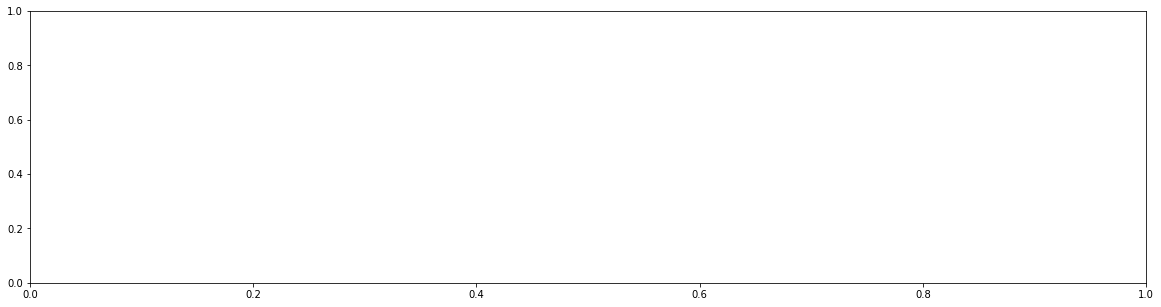

In [28]:
plt.figure(2, figsize=(20,5))
plt.bar(
    age.index,
    age.values,
    0.5,
    color='r',
    alpha=0.7
)
# plt.axis([0,80,0,20])
plt.xticks(age.index,rotation=90)

plt.show()

In [29]:
fare = train3[['Fare', 'Survived']].groupby(['Fare']).mean()
fare

,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000


TypeError: only size-1 arrays can be converted to Python scalars

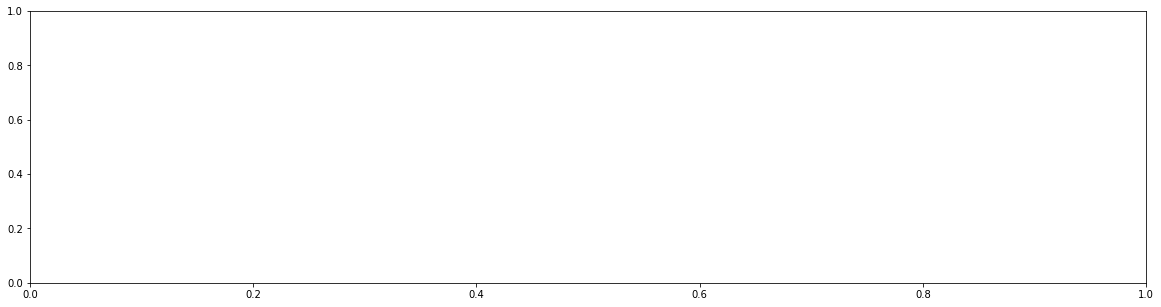

In [30]:
plt.figure(2, figsize=(20,5))
plt.bar(
    fare.index,
    fare.values,
    0.5,
    color='r',
    alpha=0.7
)
# plt.axis([0,80,0,20])
plt.xticks(fare.index,rotation=90)

plt.show()

In [31]:
jieguo = pd.DataFrame(np.arange(0,418),index=test3.loc[:,'PassengerId'])
jieguo.loc[:,0] = 1

In [32]:
jieguo.head()

,0
PassengerId,
892,1
893,1
894,1
895,1
896,1


In [33]:
jieguo.loc[test3[test3.loc[:,'isalone'] == 1].loc[:,'PassengerId'].values] = 0 #单身死

In [34]:
jieguo.head()

,0
PassengerId,
892,1
893,1
894,1
895,1
896,1


In [35]:
jieguo.to_csv('isalone.csv')

In [36]:
new3 = pd.DataFrame(np.arange(0,418),index=test3.loc[:,'PassengerId'].values)
new3[0] = 0 #默认全死
new3.head()

,0
892,0
893,0
894,0
895,0
896,0


In [37]:
new3.loc[test3[test3.loc[:,'Sex'] == 0].loc[:,'PassengerId'].values] = 1 #女性活
new3.head()

,0
892,0
893,1
894,0
895,0
896,1


In [38]:
new3.loc[test2[test2.loc[:,'Pclass'] == 3].loc[:,'PassengerId'].values] = 0 #三等仓死
new3.head()

,0
892,0
893,0
894,0
895,0
896,0


In [39]:
new3.to_csv('cangwei-xingbie.csv')#判断：男性全死，女性全活，三等仓全死

In [40]:
train3.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,familysize,isalone
0,1,0,3,1,22.0,7.2500,2,0
1,2,1,1,0,38.0,71.2833,2,0
2,3,1,3,0,26.0,7.9250,1,1
3,4,1,1,0,35.0,53.1000,2,0
4,5,0,3,1,35.0,8.0500,1,1


In [41]:
from sklearn import neighbors,datasets

In [42]:
x = train3.loc[:,['Pclass','Sex','familysize']]
y = train3.loc[:,'Survived'] #生死

clf = neighbors.KNeighborsClassifier(n_neighbors = 20)
clf.fit(x,y) #knn训练
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [43]:
z = clf.predict(test3.loc[:,['Pclass','Sex','familysize']])
z

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [44]:
s = np.arange(892, 1310)
s
results = pd.DataFrame(z, index=s)
results.head()

,0
892,0
893,0
894,0
895,0
896,1


In [45]:
results.to_csv('Titanic_knn.csv')